## Project (E) 448
## Linear Regression - Multi-Dimensional Predictive Distribution
### Daniël S. van der Westhuizen
### 17158680

In [1]:
import numpy as np
import pylab as pl
from numpy.linalg import inv
from functions import *

Here I will use the code I wrote for the making a linear regression prediction for data with a one-dimensional input and apply it to synthetic data with multiple inputs.

In [2]:
T = 100

x = np.random.rand(2,T)*2 - 1
#for a in range(0,100):
#    x[0,a] = 0.2*((int) (a/10))
#    x[1,a] = 0.2*((int) (a%10))
t = np.random.rand(T)
for a in range(0,T):
    x_loc = x[0,a]
    y_loc = x[1,a]
    r1 = np.exp( -( (( np.sqrt((x_loc+0.6)**2 + (y_loc+0.4)**2) ))**2) / (2*(0.3**2)) )
    r2 = np.exp( -( (( np.sqrt((x_loc)**2 + (y_loc)**2) ))**2) / (2*(0.2**2)) )
    r3 = np.exp( -( (( np.sqrt((x_loc-0.3)**2 + (y_loc-0.6)**2) ))**2) / (2*(0.2**2)) )
    t[a] = r1 + r2 + r3

Here I attempt to write a function code that will do Bayesian linear regression for a data set any number of dimensions. I demonstrate it with the arbitrarily defined two-dimensional input space with the output shown below.

Both the training data and the test data has to be normalized so that, for each dimension, the mean is zero.

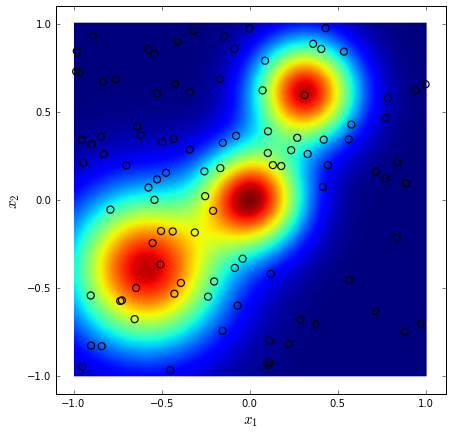

In [38]:
%matplotlib inline
pl.figure(figsize=(7,7))

#mathematics
t_actual_grid = np.zeros((100,100))
for a in range(0,100):
    for b in range(0,100):
        x_loc = -1 + (b*0.02)
        y_loc = -1 + (a*0.02)
        r1 = np.exp( -( (( np.sqrt((x_loc+0.6)**2 + (y_loc+0.4)**2) ))**2) / (2*(0.3**2)) )
        r2 = np.exp( -( (( np.sqrt((x_loc)**2 + (y_loc)**2) ))**2) / (2*(0.2**2)) )
        r3 = np.exp( -( (( np.sqrt((x_loc-0.3)**2 + (y_loc-0.6)**2) ))**2) / (2*(0.2**2)) )
        t_actual_grid[a][b] = r1 + r2 + r3
        
#figure
pl.imshow(t_actual_grid, extent=[-1,1,1,-1])
pl.ylabel(r'$x_2$', fontsize=15)
pl.xlabel(r'$x_1$', fontsize=15)
pl.gca().invert_yaxis()

pl.scatter(x[0,:],x[1,:], s=50, facecolors='none', edgecolors='BLACK', vmin=[-1,1],linewidths=1.2)
pl.ylabel(r'$x_2$', fontsize=15)
pl.xlabel(r'$x_1$', fontsize=15)

In [6]:
help(pl.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=20, c=None, marker='o', cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)
    Make a scatter plot of x vs y, where x and y are sequence like objects
    of the same lengths.
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data
    
    s : scalar or array_like, shape (n, ), optional, default: 20
        size in points^2.
    
    c : color or sequence of color, optional, default : 'b'
        `c` can be a single color format string, or a sequence of color
        specifications of length `N`, or a sequence of `N` numbers to be
        mapped to colors using the `cmap` and `norm` specified via kwargs
        (see below). Note that `c` should not be a single numeric RGB or
        RGBA sequence because that is indistinguishable from an array of
        values to be colormapped.  `c` can be a 2-D arra

I will use random training points (shown below) over the input space

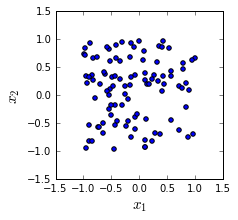

In [4]:
%matplotlib inline
pl.figure(figsize=(3,3))
pl.scatter(x[0,:],x[1,:])
pl.ylabel(r'$x_2$', fontsize=15)
pl.xlabel(r'$x_1$', fontsize=15)

Here I define means for the basis functions. If we would use, say, nine Gaussian basis functions for the one-dimensional case, then for an N-dimensional input space, there needs to 9^N basis functions. Their means must be evenly spaced throughout the normalized input space.

In [ ]:
D = 2 #dimensionality
M = 9 #basis function ticks for each dimension (i.e. M^D basis functions)
means = np.zeros((M**D,D))
done = 0
mu_vector_amount = M**D
row_count = 0
column_count = 0
for a in range(0,mu_vector_amount*D):
    means[row_count,column_count] = ( (row_count//(M**column_count))%M*2/(M-1)) - 1
    row_count += 1
    if (row_count == mu_vector_amount):
        row_count = 0
        column_count += 1

Below are the means of a the basis functions for a 2-dimensional input space when we choose the M=9

In [ ]:
%matplotlib inline
pl.figure(figsize=(3,3))
#print(means)
pl.scatter(means[:,0],means[:,1])
pl.ylabel(r'$x_2$', fontsize=15)
pl.xlabel(r'$x_1$', fontsize=15)

I wrote a function for evaluating a basis function given a point in N-dimensional input space and also a mean and a variance. I added it to the functions.py file.

Now evaluate equations 3.16, 3.53, 3.54 just like for the one-dimensional case

In [ ]:
alpha = 1
beta = 5
s = 0.2

design_matrix = np.zeros((T,M**D))
for a in range(0,M**D):
    for b in range(0,T):
        design_matrix[b,a] = basis(x[:,b],means[a,:],s)
S_N = inv( alpha*(np.identity(M*M)) + beta*np.dot(design_matrix.transpose(),design_matrix) )
m_N = beta * (   np.dot( np.dot(S_N,design_matrix.transpose()), np.atleast_2d(t).transpose() ) )

Now evaluate equation 3.58 for each of the test points.

In [ ]:
#Test point grid
pred_means = np.zeros(10000)
x_test = np.zeros((10000,2))
row_count = 0
column_count = 0
for a in range(0,100):
    for b in range(0,100):
        x_loc = -1 + (b*0.02)
        y_loc = -1 + (a*0.02)
        x_test[a+100*b,0] = x_loc
        x_test[a+100*b,1] = y_loc

In [ ]:
for b in range(1,10000):
    phi_vector_pred = np.zeros(M**D)
    for a in range(0,M**D):
        phi_vector_pred[a] = basis(x_test[b,:],means[a],s)
    phi_vector_pred = np.atleast_2d(phi_vector_pred).transpose()
    
    pred_means[b] = np.dot( m_N.transpose(), phi_vector_pred )

In [ ]:
%matplotlib inline
pl.figure(figsize=(6,3))
pl.subplot(1, 2, 1)
pl.imshow(pred_means.reshape(100,100).transpose(), extent=[-1,1,1,-1])
pl.gca().invert_yaxis()
pl.title("prediction", fontsize=15)
pl.ylabel(r'$x_2$', fontsize=15)
pl.xlabel(r'$x_1$', fontsize=15)

pl.subplot(1, 2, 2)
pl.imshow(t_actual_grid, extent=[-1,1,1,-1])
pl.gca().invert_yaxis()
pl.title("original", fontsize=15)
pl.ylabel(r'$x_2$', fontsize=15)
pl.xlabel(r'$x_1$', fontsize=15)

pl.tight_layout()

And the prediction works well. Increasing the amount of training points will increase the accuracy of the prediction and vice versa. Originally I tried using 5^2 basis functions, but the prediction was not good, so I increased it to 9^2 basis functions to get the one above.

So, now that I have confirmed that my code works on this synthetic data set, I can proceed to test it on real world data sets. The data sets should not have many dimensions or the algorhithm's computation time will be too long. For example, just setting up basis function means (for M=9) for data with 9 or more dimensions returns a memory error and takes very long for 8.

I will do these tests on new notebook files